<a href="https://colab.research.google.com/github/Adegbite-Joshua/Learning-Python/blob/master/pytorch/practice2_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import dependencies
import torch
import torchvision
import matplotlib.pyplot as plt
import os

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine

from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from tqdm.auto import tqdm

[INFO] Couldn't find torchinfo... installing it.
[INFO] Couldn't find going_modular scripts... downloading them from GitHub.
Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 4056, done.
remote: Total 4056 (delta 0), reused 0 (delta 0), pack-reused 4056
Receiving objects: 100% (4056/4056), 646.90 MiB | 28.30 MiB/s, done.
Resolving deltas: 100% (2372/2372), done.
Updating files: 100% (248/248), done.


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu";

weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT
data_transform = transforms.Compose([
    transforms.Resize(size=(28, 28)),
    transforms.Grayscale(num_output_channels=3),
    weights.transforms(),
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize(size=(28, 28)),
    # transforms.ToTensor(),
])


# data_transform = transforms.Compose([
#     transforms.Resize(size=(28, 28)),
#     transforms.Grayscale(num_output_channels=3),
#     weights.transforms(),
#     transforms.Resize(size=(28, 28)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
# ])

In [3]:
train_datasets = datasets.MNIST(root="data",
                                train=True,
                                download=True,
                                transform=data_transform
                                )
test_datasets = datasets.MNIST(root="data",
                                train=False,
                                download=True,
                                transform=data_transform
                                )

class_names = train_datasets.classes
class_names

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 35569270.77it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1097213.79it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9568684.89it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3510324.08it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [4]:
train_datasets[0][0].shape


torch.Size([1, 28, 28])

In [5]:
train_datasets[0]

(tensor([[[-2.0337, -2.0337, -2.0337, -2.0337, -2.0337, -2.0337, -2.0337,
           -2.0337, -2.0337, -2.0337, -2.0337, -2.0337, -2.0337, -2.0337,
           -2.0337, -2.0337, -2.0337, -2.0337, -2.0337, -2.0337, -2.0337,
           -2.0337, -2.0337, -2.0337, -2.0337, -2.0337, -2.0337, -2.0337],
          [-2.0337, -2.0337, -2.0337, -2.0337, -2.0337, -2.0337, -2.0337,
           -2.0337, -2.0337, -2.0337, -2.0337, -2.0337, -2.0337, -2.0337,
           -2.0337, -2.0337, -2.0337, -2.0337, -2.0337, -2.0337, -2.0337,
           -2.0337, -2.0337, -2.0337, -2.0337, -2.0337, -2.0337, -2.0337],
          [-2.0337, -2.0337, -2.0337, -2.0337, -2.0337, -2.0337, -2.0337,
           -2.0337, -2.0337, -2.0337, -2.0337, -2.0337, -2.0337, -2.0337,
           -2.0337, -2.0337, -2.0337, -2.0337, -2.0337, -2.0337, -2.0337,
           -2.0337, -2.0337, -2.0337, -2.0337, -2.0337, -2.0337, -2.0337],
          [-2.0337, -2.0337, -2.0337, -2.0337, -2.0337, -2.0337, -2.0337,
           -2.0337, -2.0337, -2.033

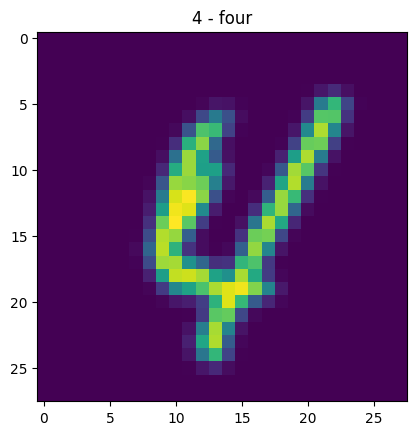

In [6]:
plt.title(class_names[train_datasets[700][1]])
plt.imshow(train_datasets[700][0].permute(1,2,0))

In [7]:
BATCH_SIZE = 128
train_dataloader = DataLoader(dataset=train_datasets, batch_size=BATCH_SIZE, shuffle=True, num_workers=os.cpu_count(),)
test_dataloader = DataLoader(dataset=test_datasets, batch_size=BATCH_SIZE, shuffle=False, num_workers=os.cpu_count())
len(train_dataloader), len(test_dataloader)

(469, 79)

In [8]:
MNIST_model_0 = torchvision.models.efficientnet_b2(weights=weights).to(device)

Downloading: "https://download.pytorch.org/models/efficientnet_b2_rwightman-c35c1473.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b2_rwightman-c35c1473.pth
100%|██████████| 35.2M/35.2M [00:00<00:00, 120MB/s]


In [9]:
for params in MNIST_model_0.features.parameters():
  params.requires_grad = False

In [10]:

MNIST_model_0.features[0][0] = torch.nn.Conv2d(1, MNIST_model_0.features[0][0].out_channels, kernel_size=3, stride=2, padding=1, bias=False)

# Recreate the classifier layer
MNIST_model_0.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1408,
                    out_features=len(class_names),
                    bias=True)).to(device)

In [11]:
summary(MNIST_model_0, input_size=(128, 1, 28, 28))

Layer (type:depth-idx)                                  Output Shape              Param #
EfficientNet                                            [128, 10]                 --
├─Sequential: 1-1                                       [128, 1408, 1, 1]         --
│    └─Conv2dNormActivation: 2-1                        [128, 32, 14, 14]         --
│    │    └─Conv2d: 3-1                                 [128, 32, 14, 14]         288
│    │    └─BatchNorm2d: 3-2                            [128, 32, 14, 14]         (64)
│    │    └─SiLU: 3-3                                   [128, 32, 14, 14]         --
│    └─Sequential: 2-2                                  [128, 16, 14, 14]         --
│    │    └─MBConv: 3-4                                 [128, 16, 14, 14]         (1,448)
│    │    └─MBConv: 3-5                                 [128, 16, 14, 14]         (612)
│    └─Sequential: 2-3                                  [128, 24, 7, 7]           --
│    │    └─MBConv: 3-6                          

In [12]:
# Create a writer for tensorboard
writer = SummaryWriter()

In [13]:
next(iter(train_dataloader))[1].shape

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


torch.Size([128])

In [14]:
def train(model, train_dataloader, test_dataloader, optimizer, loss_fn, device, epochs):

  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = engine.train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)
    test_loss, test_acc = engine.test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        device=device)

    print(f"Epoch: {epoch+1} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")
    if epoch == epochs-1:
      writer.add_scalars(main_tag="Loss",
                       tag_scalar_dict={"train_loss": train_loss,
                                        "test_loss": test_loss},
                       global_step=epoch)
      writer.add_scalars(main_tag="Accuracy",
                          tag_scalar_dict={"train_acc": train_acc,
                                          "test_acc": test_acc},
                          global_step=epoch)
      writer.add_graph(model=model,
                         # Pass in an example input
                         input_to_model=torch.randn(32, 1, 32, 32).to(device))

    # Close the writer
    writer.close()

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=MNIST_model_0.parameters(), lr=0.1)

train(model=MNIST_model_0,
                train_dataloader=train_dataloader,
                test_dataloader=test_dataloader,
                optimizer=optimizer,
                loss_fn=loss_fn,
                epochs=10,
                device=device)
# %load_ext tensorboard
# %tensorboard --logdir runs

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | Train loss: 3.2795 | Train acc: 0.4568 | Test loss: 1.8008 | Test acc: 0.5858
Epoch: 2 | Train loss: 2.2063 | Train acc: 0.4946 | Test loss: 1.4142 | Test acc: 0.6086
Epoch: 3 | Train loss: 1.7750 | Train acc: 0.5164 | Test loss: 1.2120 | Test acc: 0.6203
Epoch: 4 | Train loss: 1.5803 | Train acc: 0.5305 | Test loss: 1.2445 | Test acc: 0.6232


In [16]:
model_scripted = torch.jit.script(MNIST_model_0) # Export to TorchScript
model_scripted.save("MNIST_model_0.pth")

In [17]:
# Predicting on custom images

def pred_and_plot_image(model,
                        image_path,
                        class_names,
                        device=device):
  # transform = data_transform
  transform = transforms.Compose([
      transforms.Grayscale(num_output_channels=1),
      transforms.Resize(size=(28, 28)),
  ])
  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
  target_image /= 255

  if transform:
    target_image = transform(target_image)

  model.to(device)

  model.eval()
  with torch.inference_mode():
    target_image = target_image.unsqueeze(0)
    target_image_pred = model(target_image.to(device))

  target_image_pred_probs = torch.softmax(target_image_pred, dim=1)
  target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

  plt.imshow(target_image.squeeze())
  if class_names:
    title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob {target_image_pred_probs.max().cpu():.3f}"
  else:
    title = f"Pred: {target_image_pred_label} | Prob {target_image_pred_probs.max().cpu():.3f}"

  plt.title(title)
  plt.axis(False)

In [18]:
# Predict on the custom image
pred_and_plot_image(model=MNIST_model_0,
                    image_path="/content/five.jfif",
                    class_names=class_names,
                    device=device)

RuntimeError: [Errno 2] No such file or directory: '/content/five.jfif'